In [75]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Lasso , Ridge , ElasticNet
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler , PolynomialFeatures , MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [76]:
data = pd.read_csv('laptops.csv')
data.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [77]:
data.isnull().sum()

Brand                   0
Processor               0
RAM (GB)                0
Storage                 0
GPU                     0
Screen Size (inch)      0
Resolution              0
Battery Life (hours)    0
Weight (kg)             0
Operating System        0
Price ($)               0
dtype: int64

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [79]:
data['Processor' ].value_counts()

Processor
Intel i3       1570
Intel i7       1509
AMD Ryzen 3    1500
AMD Ryzen 9    1472
Intel i9       1456
Intel i5       1429
AMD Ryzen 5    1422
AMD Ryzen 7    1410
Name: count, dtype: int64

In [80]:
data['GPU'].value_counts()  

GPU
Nvidia RTX 2060       1746
Nvidia GTX 1650       1698
Nvidia RTX 3060       1679
AMD Radeon RX 6600    1676
AMD Radeon RX 6800    1669
Integrated            1653
Nvidia RTX 3080       1647
Name: count, dtype: int64

In [81]:
data['Brand'].value_counts()    

Brand
Apple        1262
HP           1208
MSI          1190
Microsoft    1175
Dell         1170
Asus         1165
Acer         1165
Samsung      1163
Lenovo       1145
Razer        1125
Name: count, dtype: int64

In [82]:
data['Storage'].value_counts()  

Storage
512GB SSD    2420
2TB SSD      2415
256GB SSD    2318
1TB SSD      2313
1TB HDD      2302
Name: count, dtype: int64

In [83]:
data.duplicated().any()

np.False_

In [84]:
laptop_num = data.select_dtypes(include = ['float64', 'int64'])
laptop_num_corr = laptop_num.corr()['Price ($)'][:-1] # -1 means that the latest row is SalePrice
top_features = laptop_num_corr[abs(laptop_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with Price ($):\n{}".format(len(top_features), top_features))

There is 1 strongly correlated values with Price ($):
RAM (GB)    0.616221
Name: Price ($), dtype: float64


C:\Users\mahdi\AppData\Local\Temp\ipykernel_29544\379788061.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sp_untransformed = sns.distplot(data['RAM (GB)'])


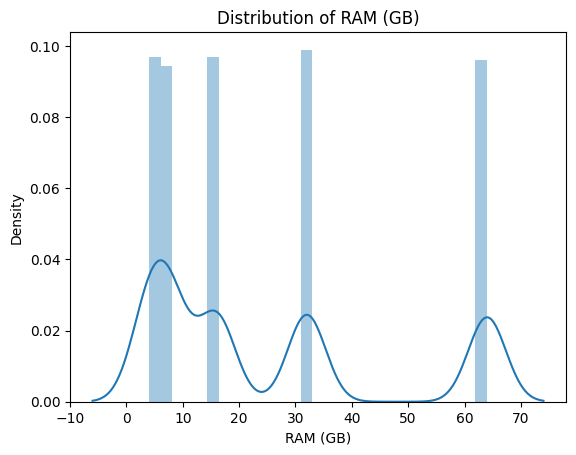

In [85]:
sp_untransformed = sns.distplot(data['RAM (GB)'])
plt.title('Distribution of RAM (GB)')
plt.show()

In [86]:
print("Skewness: %f" % data['RAM (GB)'].skew())

Skewness: 0.884265


In [87]:
data['RAM (GB)'] = np.log(data['RAM (GB)'] + 1)

C:\Users\mahdi\AppData\Local\Temp\ipykernel_29544\4093052573.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sp_transformed = sns.distplot(data['RAM (GB)'])


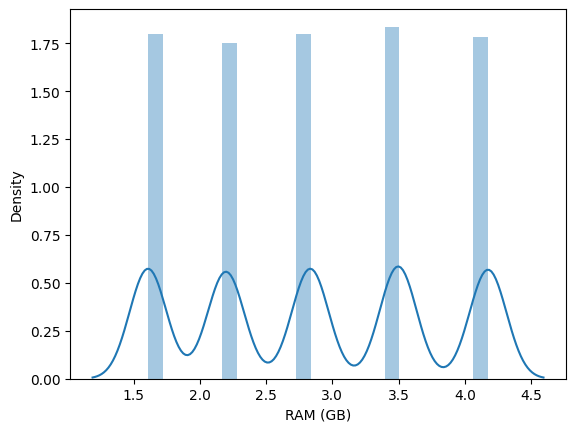

In [88]:
sp_transformed = sns.distplot(data['RAM (GB)'])

In [89]:
print("Skewness: %f" % (data['RAM (GB)']).skew())

Skewness: 0.053238


In [90]:
data.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,4.174387,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,1.609438,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,3.496508,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,1.609438,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,1.609438,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


C:\Users\mahdi\AppData\Local\Temp\ipykernel_29544\4288973046.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sp_untransformed2 = sns.distplot(data['Price ($)'])


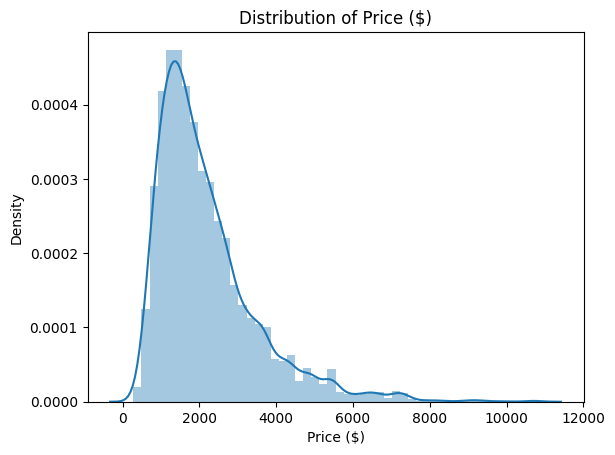

In [91]:
sp_untransformed2 = sns.distplot(data['Price ($)'])
plt.title('Distribution of Price ($)')
plt.show()

In [92]:
print("Skewness: %f" % data['Price ($)'].skew())

Skewness: 1.763708


In [93]:
data['Price ($)'] = np.log(data['Price ($)'] + 1)

C:\Users\mahdi\AppData\Local\Temp\ipykernel_29544\4288973046.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sp_untransformed2 = sns.distplot(data['Price ($)'])


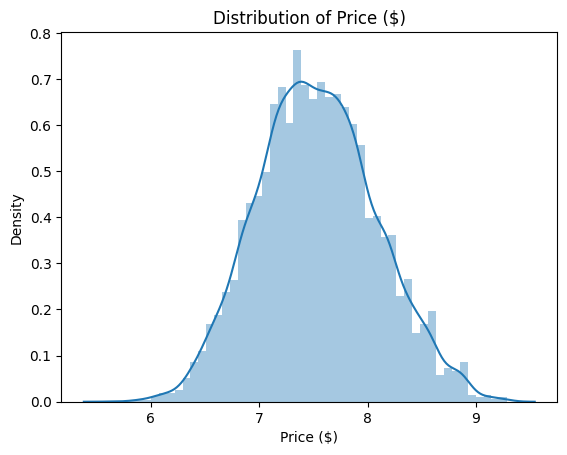

In [94]:
sp_untransformed2 = sns.distplot(data['Price ($)'])
plt.title('Distribution of Price ($)')
plt.show()

In [95]:
print("Skewness: %f" % data['Price ($)'].skew())

Skewness: 0.144184


In [96]:
data.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,4.174387,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,8.293567
1,Razer,AMD Ryzen 7,1.609438,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,7.212870
2,Asus,Intel i5,3.496508,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,7.891357
3,Lenovo,Intel i5,1.609438,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,6.622962
4,Razer,Intel i3,1.609438,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,7.630864


In [97]:
data['Brand'].unique().tolist() 

['Apple',
 'Razer',
 'Asus',
 'Lenovo',
 'Acer',
 'Dell',
 'Microsoft',
 'HP',
 'Samsung',
 'MSI']

In [98]:
data['Operating System'].unique().tolist()

['FreeDOS', 'Linux', 'Windows', 'macOS']

In [99]:
data['Storage'].unique().tolist()

['512GB SSD', '1TB SSD', '2TB SSD', '256GB SSD', '1TB HDD']

In [100]:
data['GPU'].unique().tolist()   

['Nvidia GTX 1650',
 'Nvidia RTX 3080',
 'Nvidia RTX 3060',
 'AMD Radeon RX 6600',
 'Nvidia RTX 2060',
 'AMD Radeon RX 6800',
 'Integrated']

In [101]:
data['Processor'].unique().tolist()

['AMD Ryzen 3',
 'AMD Ryzen 7',
 'Intel i5',
 'Intel i3',
 'AMD Ryzen 9',
 'AMD Ryzen 5',
 'Intel i9',
 'Intel i7']

In [102]:
data['Resolution'].unique().tolist()

['2560x1440', '1366x768', '3840x2160', '1920x1080']

In [103]:
data['Resolution'] = data['Resolution'].str.replace('2560x1440', '2k')
data['Resolution'] = data['Resolution'].str.replace('1366x768', 'HD')
data['Resolution'] = data['Resolution'].str.replace('1920x1080', 'Full HD')
data['Resolution'] = data['Resolution'].str.replace('3840x2160', '4k')

In [104]:
data['Screen Size (inch)'].unique().tolist()

[17.3, 14.0, 13.3, 16.0, 15.6]

In [105]:
data.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,4.174387,512GB SSD,Nvidia GTX 1650,17.3,2k,8.9,1.42,FreeDOS,8.293567
1,Razer,AMD Ryzen 7,1.609438,1TB SSD,Nvidia RTX 3080,14.0,HD,9.4,2.57,Linux,7.212870
2,Asus,Intel i5,3.496508,2TB SSD,Nvidia RTX 3060,13.3,4k,8.5,1.74,FreeDOS,7.891357
3,Lenovo,Intel i5,1.609438,256GB SSD,Nvidia RTX 3080,13.3,HD,10.5,3.10,Windows,6.622962
4,Razer,Intel i3,1.609438,256GB SSD,AMD Radeon RX 6600,16.0,4k,5.7,3.38,Linux,7.630864


In [106]:
data1 = pd.get_dummies(data=data, columns = ['Brand' , 'Processor', 'Storage' , 'Screen Size (inch)' , 'Resolution' , 'Operating System' , 'GPU']) 

In [107]:
data1.head()

,RAM (GB),Battery Life (hours),Weight (kg),Price ($),Brand_Acer,Brand_Apple,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo,...,Operating System_Linux,Operating System_Windows,Operating System_macOS,GPU_AMD Radeon RX 6600,GPU_AMD Radeon RX 6800,GPU_Integrated,GPU_Nvidia GTX 1650,GPU_Nvidia RTX 2060,GPU_Nvidia RTX 3060,GPU_Nvidia RTX 3080
0,4.174387,8.9,1.42,8.293567,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1.609438,9.4,2.57,7.212870,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,3.496508,8.5,1.74,7.891357,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1.609438,10.5,3.10,6.622962,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
4,1.609438,5.7,3.38,7.630864,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False


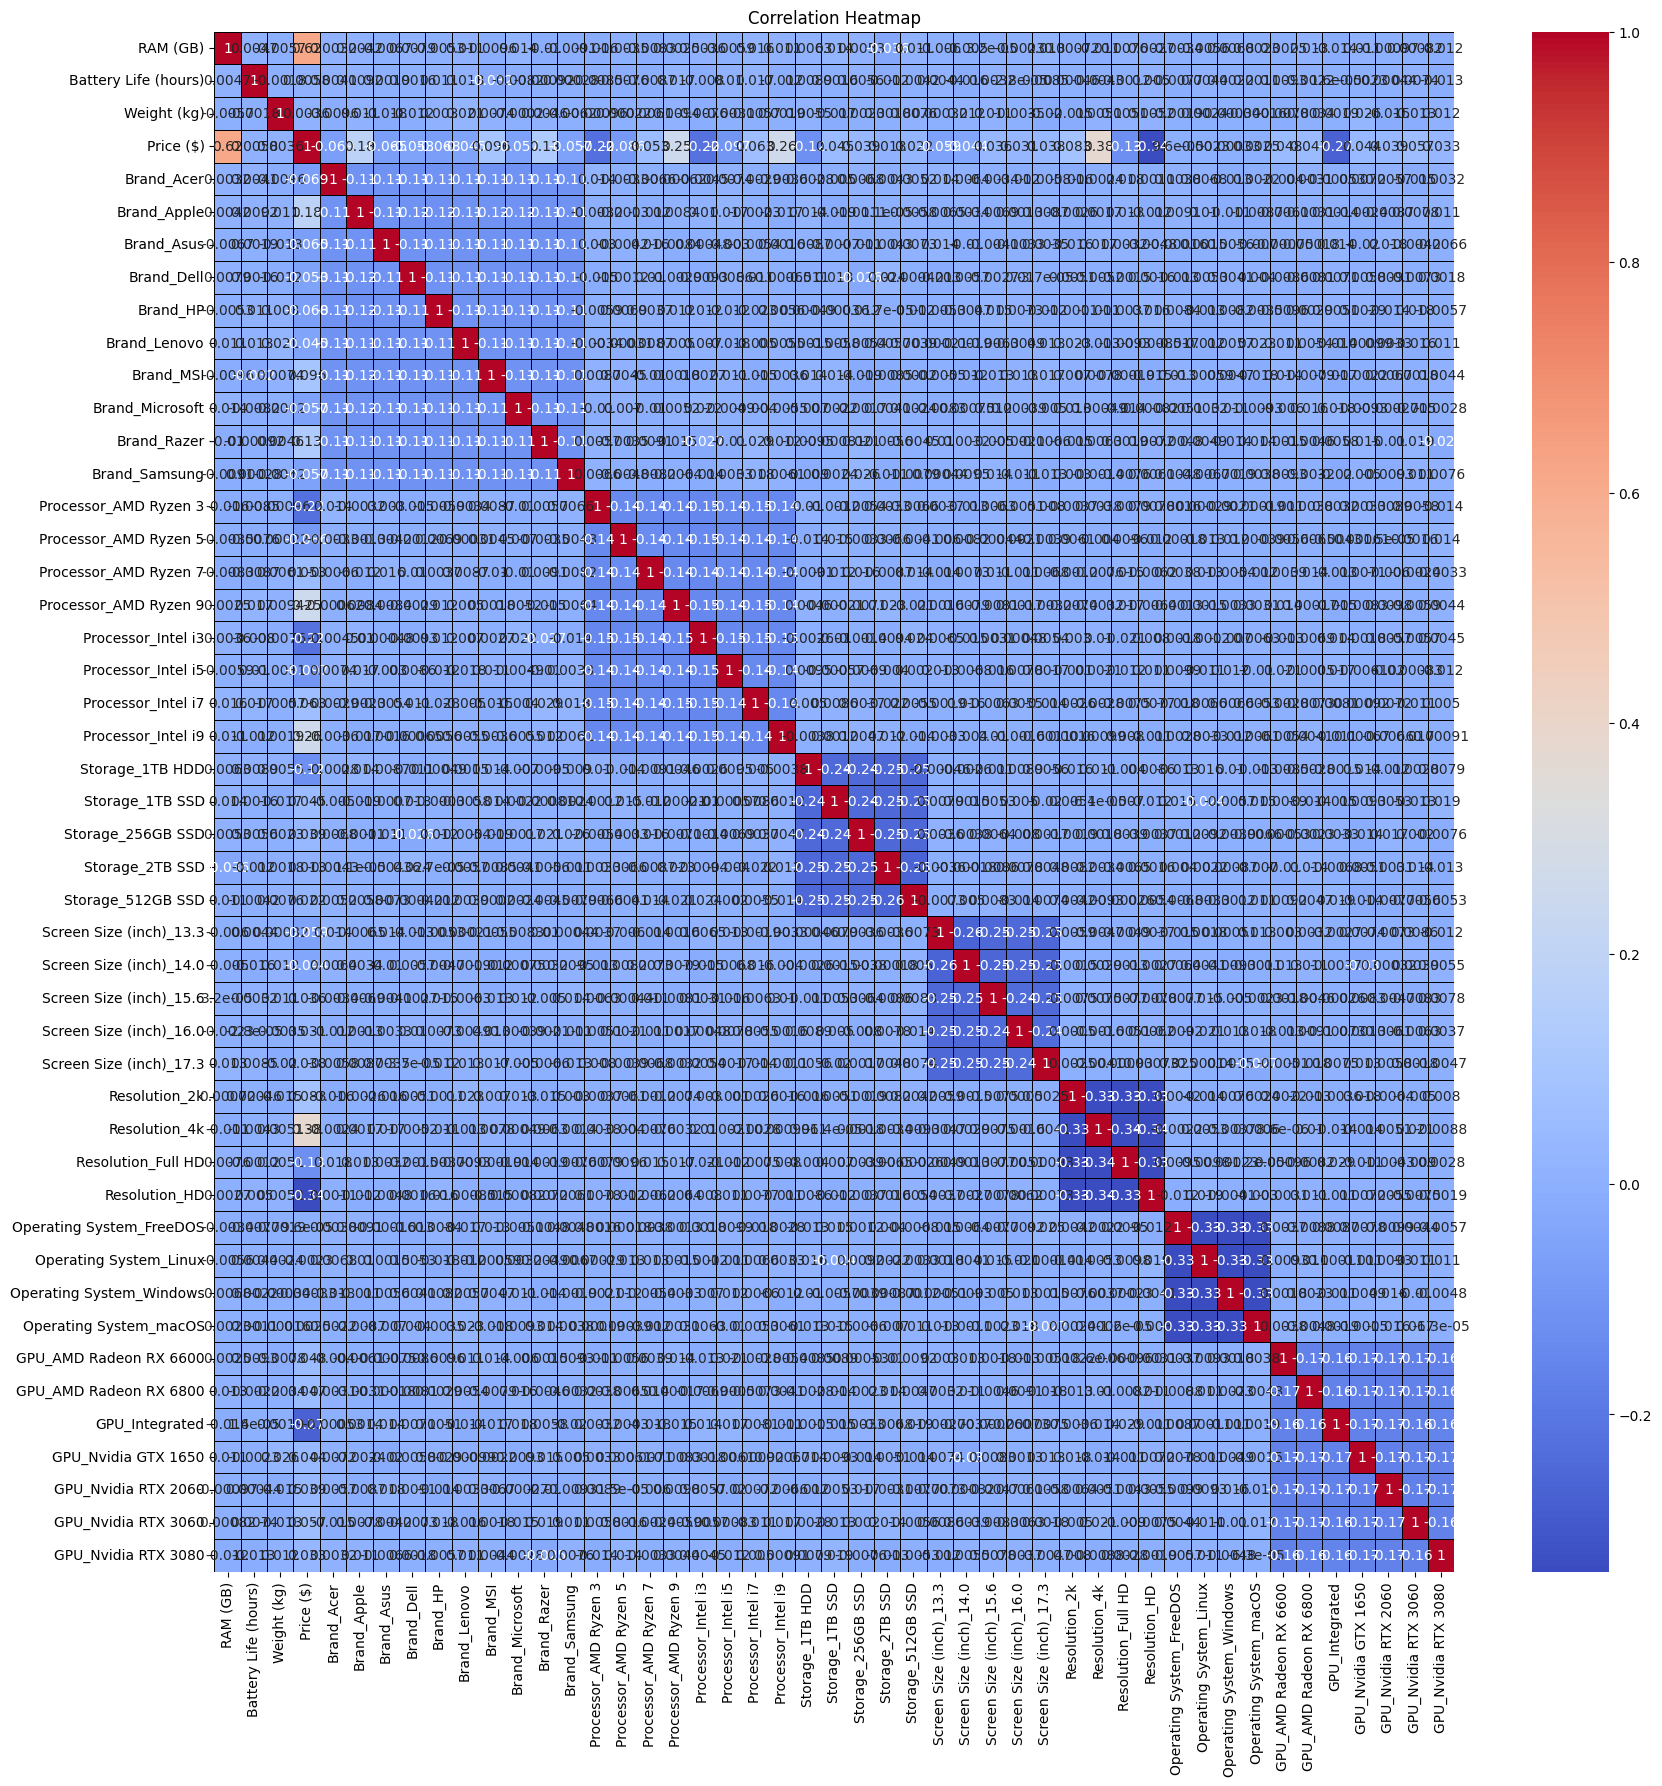

In [108]:
corr = data1.corr()

# Plotting the heatmap
plt.figure(figsize=(20 , 20 ))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()

In [109]:
X = data1.drop("Price ($)", axis=1)
X.head()

,RAM (GB),Battery Life (hours),Weight (kg),Brand_Acer,Brand_Apple,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo,Brand_MSI,...,Operating System_Linux,Operating System_Windows,Operating System_macOS,GPU_AMD Radeon RX 6600,GPU_AMD Radeon RX 6800,GPU_Integrated,GPU_Nvidia GTX 1650,GPU_Nvidia RTX 2060,GPU_Nvidia RTX 3060,GPU_Nvidia RTX 3080
0,4.174387,8.9,1.42,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1.609438,9.4,2.57,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,3.496508,8.5,1.74,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1.609438,10.5,3.10,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
4,1.609438,5.7,3.38,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False


In [110]:
y = data1["Price ($)"].copy()
y.head()

0    8.293567
1    7.212870
2    7.891357
3    6.622962
4    7.630864
Name: Price ($), dtype: float64

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [112]:
ss=StandardScaler()
ss

StandardScaler()

In [113]:
X_train=ss.fit_transform(X_train)

In [114]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [115]:
X_test=ss.transform(X_test)
laptop_price_predictions = lm.predict(X_test)
laptop_price_predictions

array([7.02389643, 7.05162262, 7.84809312, ..., 6.88833336, 7.24945634,
       6.77615668], shape=(3531,))

In [116]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, laptop_price_predictions)
mse

0.009031209626582647

In [117]:
lm.score(X_test,y_test)

0.9703558571608275

In [118]:
r2_score(y_test,laptop_price_predictions)

0.9703558571608275

In [119]:
steps = [('scaler' , MinMaxScaler()), ('model', LinearRegression())]


In [120]:
pipe = Pipeline(steps = steps)


In [121]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LinearRegression())])

In [122]:
laptop_price_predictions_MM = pipe.predict(X_test)
mse = mean_squared_error(y_test, laptop_price_predictions_MM)
rmse = np.sqrt(mse)
rmse

np.float64(0.0950326766253727)

In [123]:
r2_score(laptop_price_predictions_MM, y_test)

0.9692620100492079

C:\Users\mahdi\AppData\Local\Temp\ipykernel_29544\1627792260.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\mahdi\AppData\Local\Temp\ipykernel_29544\1627792260.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

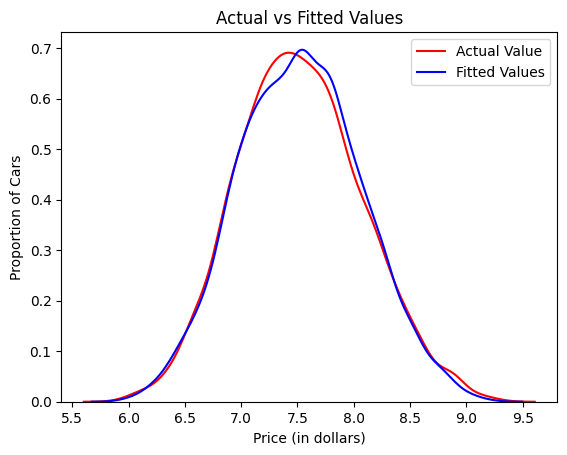

In [124]:
def  plot_dis(y,yhat):
    
    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()
plot_dis(y_test, laptop_price_predictions)


C:\Users\mahdi\AppData\Local\Temp\ipykernel_29544\1627792260.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\mahdi\AppData\Local\Temp\ipykernel_29544\1627792260.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

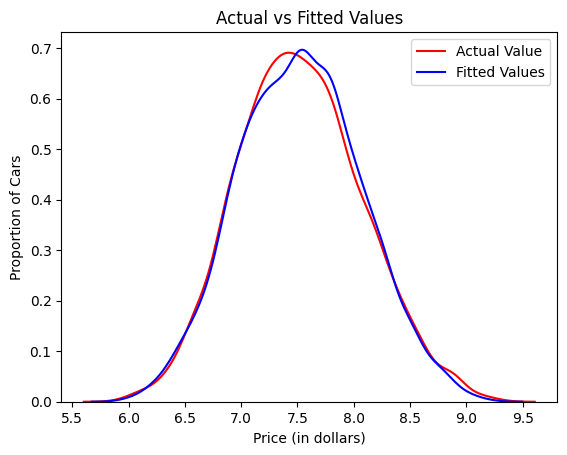

In [125]:
plot_dis(y_test, laptop_price_predictions_MM)   

In [126]:
steps2 = [('scaler', StandardScaler()), ('poly', PolynomialFeatures(include_bias=False, degree=2)), ('model', LinearRegression())]
pipe2 = Pipeline(steps2)
pipe2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [127]:

print("R^2 on training  data:", pipe2.score(X_train, y_train))
print("R^2 on testing data:", pipe2.score(X_test,y_test))

R^2 on training  data: 0.9887248528126075
R^2 on testing data: 0.986758327067996


In [128]:
steps3 = [('scaler', MinMaxScaler()), ('poly', PolynomialFeatures(include_bias=False, degree=2)), ('model', LinearRegression())]  
pipe3 = Pipeline(steps3)
pipe3.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [129]:
print("R^2 on training  data:", pipe3.score(X_train, y_train))
print("R^2 on testing data:", pipe3.score(X_test,y_test))

R^2 on training  data: 0.9887248528126075
R^2 on testing data: 0.9867583270679963


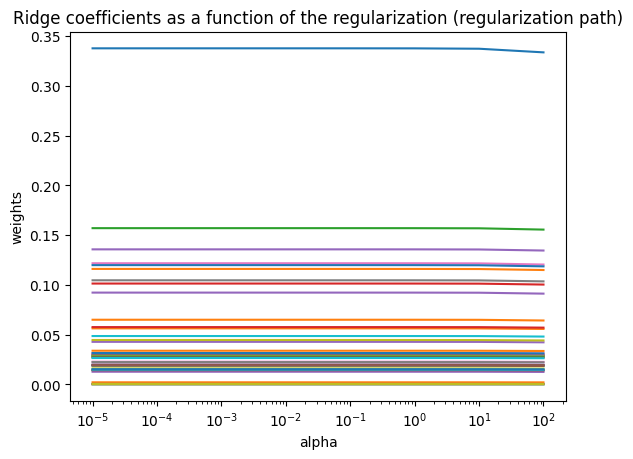

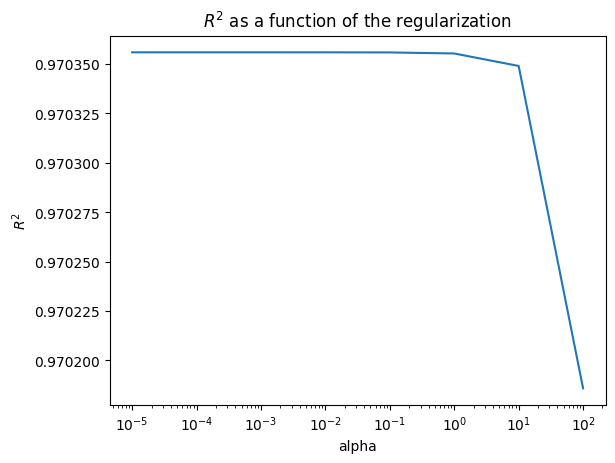

In [130]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100]
R_2=[]
coefs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    coefs.append(abs(ridge.coef_))
    R_2.append(ridge.score(X_test,y_test))


ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization (regularization path)")
plt.show()


ax = plt.gca()
ax.plot(alphas, R_2)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("$R^2$")
plt.title("$R^2$ as a function of the regularization")
plt.show()          

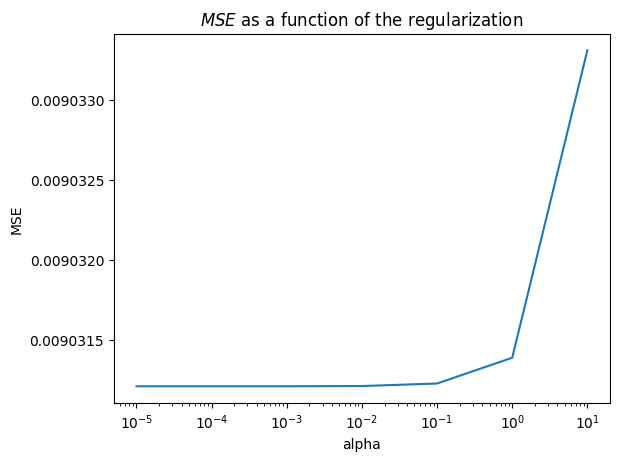

In [131]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10]
MEAN_SQE=[]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    MEAN_SQE.append(mean_squared_error(ridge.predict(X_test),y_test))

ax = plt.gca()
ax.plot(alphas, MEAN_SQE)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.title("$MSE$ as a function of the regularization")
plt.show()

ridge

In [132]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), ('model',Ridge(alpha=1))]
pipe = Pipeline(Input)

In [133]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('ss', StandardScaler()), ('model', Ridge(alpha=1))])

In [134]:
predicted=pipe.predict(X_test)
pipe.score(X_test, y_test)

0.9867582380338596

In [135]:
param_grid = {
    "polynomial__degree": [1,2,3],
    "model__alpha":[0.0001,0.001,0.01,0.1,1,10]
}

In [136]:
search = GridSearchCV(pipe, param_grid, n_jobs=2)

search.fit(X_train, y_train)
search

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ss', StandardScaler()),
                                       ('model', Ridge(alpha=1))]),
             n_jobs=2,
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'polynomial__degree': [1, 2, 3]})

In [137]:
pd.DataFrame(search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_polynomial__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014264,0.001654,0.002318,0.001007,0.0001,1,"{'model__alpha': 0.0001, 'polynomial__degree': 1}",0.970759,0.969570,0.970117,0.968086,0.968497,0.969406,0.000993,11
1,0.652360,0.125419,0.050860,0.004010,0.0001,2,"{'model__alpha': 0.0001, 'polynomial__degree': 2}",0.986179,0.986681,0.986274,0.985834,0.986342,0.986262,0.000273,6
2,20.004756,1.503342,0.686030,0.121887,0.0001,3,"{'model__alpha': 0.0001, 'polynomial__degree': 3}",0.685321,0.571513,0.645053,0.673522,0.697924,0.654666,0.045108,18
3,0.013079,0.007076,0.001158,0.001819,0.0010,1,"{'model__alpha': 0.001, 'polynomial__degree': 1}",0.970759,0.969570,0.970117,0.968086,0.968497,0.969406,0.000993,10
4,0.571239,0.136277,0.037583,0.005003,0.0010,2,"{'model__alpha': 0.001, 'polynomial__degree': 2}",0.986179,0.986681,0.986274,0.985834,0.986342,0.986262,0.000273,5


In [138]:
print("best_score_: ",search.best_score_)
print("best_params_: ",search.best_params_)

best_score_:  0.9862667839054641
best_params_:  {'model__alpha': 10, 'polynomial__degree': 2}


In [139]:

predict = search.predict(X_test)

predict 

array([6.95358544, 7.1310682 , 7.78555663, ..., 6.95138855, 7.17770933,
       6.72687592], shape=(3531,))

In [140]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('ss', StandardScaler()), ('model', Ridge(alpha=10))])

In [141]:
predict = best.predict(X_test)
predict

array([6.95358544, 7.1310682 , 7.78555663, ..., 6.95138855, 7.17770933,
       6.72687592], shape=(3531,))

In [142]:
best.score(X_test, y_test)

0.9867567748635268

In [143]:
best.fit(X,y)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('ss', StandardScaler()), ('model', Ridge(alpha=10))])

lasso

In [147]:
la = Lasso(alpha=0.1)
la.fit(X_train,y_train)
la

Lasso(alpha=0.1)

In [148]:
predicted = la.predict(X_test)
predicted

array([7.47687506, 7.16171076, 7.75680714, ..., 7.03737194, 7.21493104,
       7.33522144], shape=(3531,))

In [149]:
print("R^2 on training  data ",lm.score(X_train, y_train))
print("R^2 on testing data ",lm.score(X_test,y_test))

R^2 on training  data  0.9698021281314892
R^2 on testing data  0.9703558571608275


C:\Users\mahdi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.692e+00, tolerance: 2.478e-01
  model = cd_fast.enet_coordinate_descent(


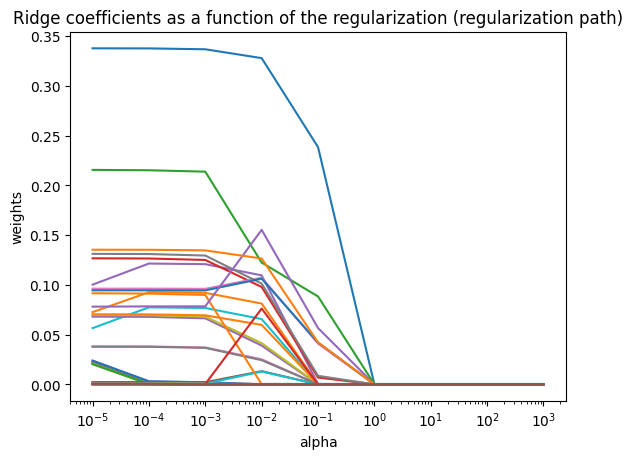

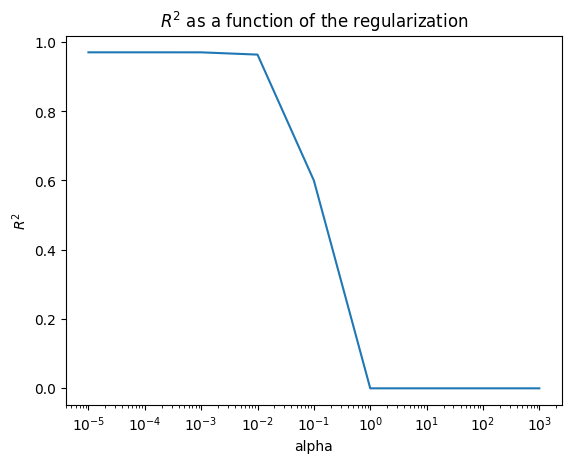

In [151]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
R_2=[]
coefs = []
for alpha in alphas:
    la=Lasso(alpha=alpha)
    
    la.fit(X_train, y_train)
    coefs.append(abs(la.coef_))
    R_2.append(la.score(X_test,y_test))


ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization (regularization path)")
plt.show()


ax = plt.gca()
ax.plot(alphas, R_2)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("$R^2$")
plt.title("$R^2$ as a function of the regularization")
plt.show()

In [152]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), ('model',Lasso(alpha=1, tol = 0.2))]
pipe = Pipeline(Input)

In [153]:
pipe.fit(X_train, y_train)
pipe.predict(X_test)

array([7.54001054, 7.54001054, 7.54001054, ..., 7.54001054, 7.54001054,
       7.54001054], shape=(3531,))

In [ ]:
print("R^2 on training  data ",pipe.score(X_train, y_train))
print("R^2 on testing data ",pipe.score(X_test,y_test))

#Model Choice: The chosen algorithm may not be appropriate for the data.

R^2 on training  data  0.0
R^2 on testing data  -0.0008648531064396892


In [155]:
param_grid = {
    "polynomial__degree": [ 1, 2,3],
    "model__alpha":[0.0001,0.001,0.01,0.1,1,10]
}

In [156]:
search = GridSearchCV(pipe, param_grid, n_jobs=1)
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ss', StandardScaler()),
                                       ('model', Lasso(alpha=1, tol=0.2))]),
             n_jobs=1,
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'polynomial__degree': [1, 2, 3]})

In [157]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('ss', StandardScaler()),
                ('model', Lasso(alpha=0.001, tol=0.2))])

In [158]:
best.score(X_test,y_test)

0.9875836057147493

elastic

In [159]:
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [160]:
predicted=enet.predict(X_test)
predicted

array([7.32976332, 7.13154089, 7.7316445 , ..., 6.9239127 , 7.11527046,
       7.24145266], shape=(3531,))

In [161]:
print("R^2 on training  data ", enet.score(X_train, y_train))
print("R^2 on testing data ", enet.score(X_test,y_test))

R^2 on training  data  0.8168418330012326
R^2 on testing data  0.8167842933979549


In [162]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), ('model',ElasticNet(alpha=0.1, l1_ratio=0.1))]
pipe = Pipeline(Input)
pipe.fit(X_train, y_train)
print("R^2 on training  data ",pipe.score(X_train, y_train))
print("R^2 on testing data ",pipe.score(X_test,y_test))

R^2 on training  data  0.976718781534109
R^2 on testing data  0.9759712695243256


In [165]:
param_grid = {
    "polynomial__degree": [ 1, 2,3],
    "model__alpha":[0.0001,0.001,0.01,0.1,1,10],
    "model__l1_ratio":[0.1,0.25,0.5,0.75,0.9]
}


In [166]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), ('model',ElasticNet(tol = 0.2))]
pipe = Pipeline(Input)
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_test, y_test)
best=search.best_estimator_
best.score(X_test,y_test)

0.987648292345518